In [1]:
import sys
sys.path.append("..")

from didgelab.calc.sim.cadsd import CADSD
from didgelab.calc.geo import Geo
from didgelab.app import App
from didgelab.initializer import init_console_no_output

from time import time
import numpy as np
import pandas as pd
import numpy as np

init_console_no_output()

2023-09-04 15:06:59,188 [INFO] {app.py:104} 
 _____  _     _              _           _     
|  __ \(_)   | |            | |         | |    
| |  | |_  __| | __ _  ___  | |     __ _| |__  
| |  | | |/ _` |/ _` |/ _ \ | |    / _` | '_ \ 
| |__| | | (_| | (_| |  __/ | |___| (_| | |_) |
|_____/|_|\__,_|\__, |\___| |______\__,_|_.__/ 
                 __/ |                         
                |___/                          
Starting /Users/jane03/miniconda3/envs/didge/lib/python3.10/site-packages/ipykernel_launcher.py -f /Users/jane03/Library/Jupyter/runtime/kernel-8401c976-b337-423f-8138-a7d0716bb476.json


In [2]:
App.get_config()

{'sim.correction': 'svm',
 'sim.resolution': 2,
 'sim.fmin': 30,
 'sim.fmax': 1000,
 'n_threads': 8,
 'log_level': 'info'}

In [3]:
from tqdm import tqdm

resolutions = (1,2,4,8,16,32)
num_segments = (2,5,20,50,100)

df = pd.DataFrame(index=resolutions, columns=num_segments)
n_tries = 20
App.get_config()["sim.correction"] = "none"

pbar = tqdm(total=len(resolutions)*len(num_segments)*n_tries)
for r in resolutions:
    App.get_config()["sim.resolution"] = r

    for num in num_segments:
        t=time()
        for i in range(n_tries):
            x = 2000*np.arange(0,1,1/num)
            y = 32+35*np.arange(0,1,1/num)
            geo = list(zip(x,y))
            cadsd = Geo(geo).get_cadsd()
            imp = cadsd.get_impedance_spektrum()
            pbar.update(1)
        t = (time()-t)/n_tries
        df[num][r] = t
        

#df = df.round(2)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 599/600 [02:24<00:00, 21.28it/s]

Text(0, 0.5, 'duration [s]')

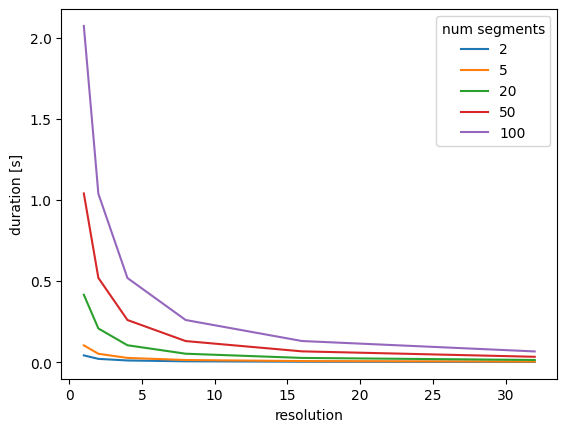

In [4]:
import matplotlib.pyplot as plt
for c in df.columns:
    plt.plot(df.index, df[c], label=c)
plt.legend(title="num segments")
plt.xlabel("resolution")
plt.xlabel("resolution")
plt.ylabel("duration [s]")

In [27]:
df

,2,5,20,50,100
1,0.041726,0.103648,0.415834,1.040512,2.073504
2,0.020271,0.051623,0.207703,0.519496,1.038489
4,0.010319,0.026101,0.104164,0.259881,0.518767
8,0.005217,0.013152,0.052045,0.130033,0.259965
16,0.002647,0.006644,0.026122,0.066564,0.130254
32,0.001418,0.003412,0.013368,0.033122,0.066165


In [28]:
# duration scales linearly with the resolution
_df = df.copy()
for c in _df.columns:
    _df[c] *= _df.index
_df

,2,5,20,50,100
1,0.041726,0.103648,0.415834,1.040512,2.073504
2,0.040542,0.103247,0.415406,1.038992,2.076977
4,0.041277,0.104402,0.416654,1.039526,2.075068
8,0.041738,0.105219,0.416362,1.040266,2.079722
16,0.042345,0.106304,0.417953,1.065028,2.084067
32,0.045375,0.109186,0.42779,1.059909,2.117269


In [34]:
# duration scales linearly with the number of segments
_df = df.copy()
for c in _df.columns:
    _df[c] /= c
_df

,2,5,20,50,100
1,0.020863,0.02073,0.020792,0.02081,0.020735
2,0.010136,0.010325,0.010385,0.01039,0.010385
4,0.00516,0.00522,0.005208,0.005198,0.005188
8,0.002609,0.00263,0.002602,0.002601,0.0026
16,0.001323,0.001329,0.001306,0.001331,0.001303
32,0.000709,0.000682,0.000668,0.000662,0.000662
